In [1]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

M2_data = pf.get_series(series_id="M2SL", api_key=api_key)
assets = pf.get_series(series_id="WALCL", api_key=api_key)

print(M2_data)
print(assets)

M2_info = pf.get_series_info(series_id="M2SL", api_key=api_key)
assets_info = pf.get_series_info(series_id="WALCL", api_key=api_key)

    realtime_start realtime_end       date    value
0       2023-05-13   2023-05-13 1959-01-01    286.6
1       2023-05-13   2023-05-13 1959-02-01    287.7
2       2023-05-13   2023-05-13 1959-03-01    289.2
3       2023-05-13   2023-05-13 1959-04-01    290.1
4       2023-05-13   2023-05-13 1959-05-01    292.2
..             ...          ...        ...      ...
766     2023-05-13   2023-05-13 2022-11-01  21396.9
767     2023-05-13   2023-05-13 2022-12-01  21357.7
768     2023-05-13   2023-05-13 2023-01-01  21212.0
769     2023-05-13   2023-05-13 2023-02-01  21075.4
770     2023-05-13   2023-05-13 2023-03-01  20818.1

[771 rows x 4 columns]
     realtime_start realtime_end       date      value
0        2023-05-13   2023-05-13 2002-12-18   719542.0
1        2023-05-13   2023-05-13 2002-12-25   732059.0
2        2023-05-13   2023-05-13 2003-01-01   730994.0
3        2023-05-13   2023-05-13 2003-01-08   723762.0
4        2023-05-13   2023-05-13 2003-01-15   720074.0
...             ...   

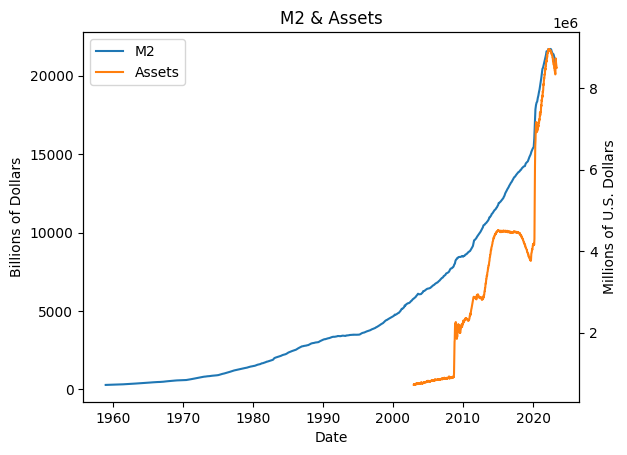

In [2]:
# Convert the "date" column to datetime format
M2_data['date'] = pd.to_datetime(M2_data['date'])
assets['date'] = pd.to_datetime(assets['date'])

# Create a figure and two subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plotting the data for the first dataframe on ax1
ax1.plot(M2_data['date'], M2_data['value'], color='tab:blue', label='M2')
ax1.set_xlabel('Date')
ax1.set_ylabel(M2_info.units)

# Plotting the data for the second dataframe on ax2
ax2.plot(assets['date'], assets['value'], color='tab:orange', label='Assets')
ax2.set_ylabel(assets_info.units)

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Plot the graph
plt.xlabel('Date')
plt.title("M2 & Assets")
plt.xticks(rotation=45)

plt.show()

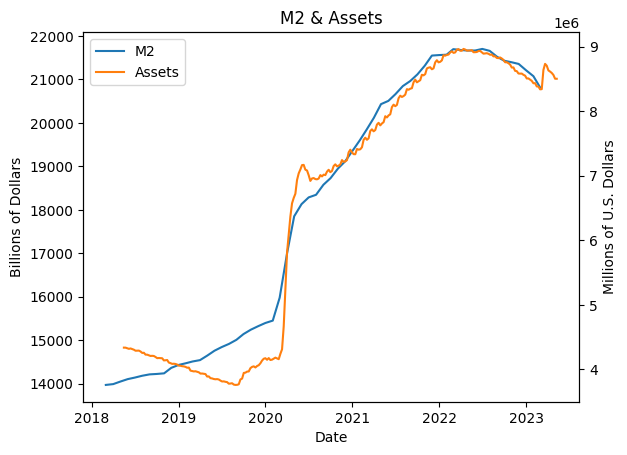

In [3]:
import matplotlib.pyplot as plt

# Convert the "date" column to datetime format
M2_data['date'] = pd.to_datetime(M2_data['date'])
assets['date'] = pd.to_datetime(assets['date'])

# Filter the dataframes for the last 5 years
last_5_years = pd.DateOffset(years=5)
M2_data_last_5 = M2_data[M2_data['date'] >= M2_data['date'].max() - last_5_years]
assets_last_5 = assets[assets['date'] >= assets['date'].max() - last_5_years]

# Create a figure and two subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plotting the data for the first dataframe on ax1
ax1.plot(M2_data_last_5['date'], M2_data_last_5['value'], color='tab:blue', label='M2')
ax1.set_xlabel('Date')
ax1.set_ylabel(M2_info.units)

# Plotting the data for the second dataframe on ax2
ax2.plot(assets_last_5['date'], assets_last_5['value'], color='tab:orange', label='Assets')
ax2.set_ylabel(assets_info.units)

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Title and rotation of x-axis ticks
plt.title("M2 & Assets")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [5]:
# Convert DataFrame to JSON
M2_json = M2_data.to_json(orient='records')
assets_json = assets.to_json(orient='records')

# Parse the JSON
data1 = json.loads(M2_json)
data2 = json.loads(assets_json)

# Get the last item
last_item1 = data1[-1]
last_item2 = data2[-1]

print(str(M2_info.title) + ": " + str(last_item1['value']) + " " + str(M2_info.units) + " | Last Updated: " + str(M2_info.last_updated))
print(str(assets_info.title) + ": " + str(last_item2['value']) + " " + str(assets_info.units) + " | Last Updated: " + str(assets_info.last_updated))

M2: 20818.1 Billions of Dollars | Last Updated: 2023-04-25 12:03:02-05
Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level: 8503017.0 Millions of U.S. Dollars | Last Updated: 2023-05-11 15:33:02-05


In [ ]:
print("Info: " + str(M2_info.id))
print("Title: " + str(M2_info.title))
print("Frequency: " + str(M2_info.frequency))
print("Units: " + str(M2_info.units))
print("Last Updated: " + str(M2_info.last_updated))
print("Popularity: " + str(M2_info.popularity))
print("Notes: " + str(M2_info.notes))

Info: M2SL
Title: M2
Frequency: Monthly
Units: Billions of Dollars
Last Updated: 2023-04-25 12:03:02-05
Popularity: 94
Notes: Before May 2020, M2 consists of M1 plus (1) savings deposits (including money market deposit accounts); (2) small-denomination time deposits (time deposits in amounts of less than $100,000) less individual retirement account (IRA) and Keogh balances at depository institutions; and (3) balances in retail money market funds (MMFs) less IRA and Keogh balances at MMFs.

Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted separately, and adding this result to seasonally adjusted M1.

For more information on the